In [1]:
# 請勿更動此區塊程式碼

import time
import numpy as np
import pandas as pd

EXECUTION_START_TIME = time.time()

df = pd.read_csv('data.csv')
df_test = pd.read_csv('test.csv')

/home/tingyu/.local/lib/python3.7/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## 資料分析與前處理

In [2]:
# import
pd.options.mode.chained_assignment = None      # 解決會噴 warning 的狀況

from sklearn.impute import SimpleImputer       # 匯入填補缺失值的工具
from sklearn.preprocessing import LabelEncoder # 匯入 Label Encoder
import matplotlib.pyplot as plt
import seaborn as sns

### 處理缺失值
檢查輸入的資料是否有缺失值，由count欄位可以確定沒有。

In [3]:
train_x = df[['Open Price','High Price', 'Close Price','Low Price', 'Volume']]
train_y = df[['Close Price']]
test_x = df_test[['Open Price','High Price', 'Close Price','Low Price', 'Volume']]
test_y = df_test[['Close Price']]

print(train_x.describe())
print(train_y.describe())
print(test_x.describe())
print(test_y.describe())

        Open Price   High Price    Low Price        Volume
count  2264.000000  2264.000000  2264.000000  2.264000e+03
mean   1656.142686  1664.427054  1647.425128  2.948755e+09
std     485.292193   484.808706   485.576116  1.351675e+09
min     679.280000   695.270000   666.790000  5.181584e+08
25%    1238.602500  1246.695000  1227.587500  2.048980e+09
50%    1649.135000  1656.145000  1639.600000  2.506637e+09
75%    2070.300000  2079.507500  2058.757500  3.373334e+09
max    2692.710000  2694.970000  2685.920000  9.120100e+09
       Close Price
count  2264.000000
mean   1656.767562
std     485.226120
min     676.530000
25%    1239.337500
50%    1650.405000
75%    2071.190000
max    2690.160000
        Open Price   High Price    Low Price        Volume
count   252.000000   252.000000   252.000000  2.520000e+02
mean   2747.910397  2762.747778  2730.143929  2.154050e+09
std      99.017479    92.991345   106.490954  4.538626e+08
min    2363.120000  2410.340000  2346.580000  9.516523e+08
25%

### 轉換類別資料
為了使得NN可以運作，新增漲或跌的label

In [16]:
trand = []
lastPrice = 0.0
for price in train_y['Close Price'] :
    if price > lastPrice :
        trand.append(1)
    elif price == lastPrice :
        trand.append(0)
    else :
        trand.append(-1)
    lastPrice = price
    
nn_train_y = pd.DataFrame({
    'trand':trand
})

In [17]:
trand = []
lastPrice = 0.0
for price in test_y['Close Price'] :
    if price > lastPrice :
        trand.append(1)
    elif price == lastPrice :
        trand.append(0)
    else :
        trand.append(-1)
    lastPrice = price
    
nn_test_y = pd.DataFrame({
    'trand':trand
})

### 轉換數值資料
對Volume做正規化，以提高精準度。

In [6]:
from sklearn import preprocessing

array = train_x['Volume'].values.reshape(-1,1)
train_x['Volume'] = preprocessing.normalize(array, axis=0)
array = test_x['Volume'].values.reshape(-1,1)
test_x['Volume'] = preprocessing.normalize(array, axis=0)

由於不可能知道當天的成交狀況，因此要將成交狀況位移一格

In [ ]:
for price in test_y

### 轉換日期資料

In [7]:
train_x['Date'] = range(0,len(train_x.index))
test_x['Date'] = range(len(train_x.index),len(train_x.index)+len(test_x.index))

## 模型訓練

匯入需要的套件

In [8]:
from sklearn.model_selection import KFold             # 匯入 K 次交叉驗證工具
from sklearn.tree import DecisionTreeClassifier       # 匯入決策樹模型
from sklearn.metrics import accuracy_score            # 匯入準確度計算工具
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPClassifier

### 線性回歸

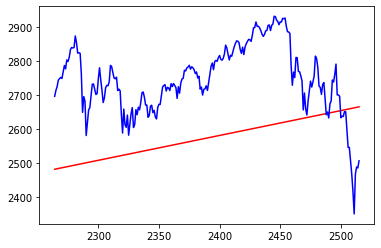

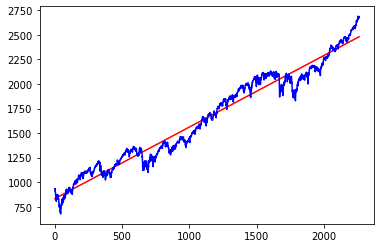

In [82]:
model = LinearRegression()
model.fit(np.array(train_x['Date']).reshape(-1, 1),train_y)

predict = model.predict(np.array(test_x['Date']).reshape(-1, 1))
plt.plot(test_x['Date'], predict, "r")
plt.plot(test_x['Date'], test_y, "b")
plt.show()

predict = model.predict(np.array(train_x['Date']).reshape(-1, 1))
plt.plot(train_x['Date'], predict, "r")
plt.plot(train_x['Date'], train_y, "b")
plt.show()

### NN
由於NN是用來分類，所以要先把預測內容轉換成類別（漲跌）

In [56]:
model = MLPClassifier(solver='lbfgs', random_state=1010)
model.fit(np.array(train_x['Date']).reshape(-1, 1),nn_train_y)

predict = model.predict(np.array(train_x['Date']).reshape(-1, 1))

tp = 0
tn = 0
fp = 0
fn = 0

pd.DataFrame(predict).hist()
nn_train_y['trand'].hist()

for index in range(0,len(predict)) :
    if predict[index]==1:
        if nn_train_y['trand'][index]==1:
            tp = tp + 1
        else:
            fp = fp + 1
    else:
        if nn_train_y['trand'][index]==1:
            fn = fn + 1
        else:
            tn = tn + 1
print(tp)
print(fp)
print(tn)
print(fn)

# print("Recall:{}".format(tp/(tp+fn)))
# print("Position:{}".format(tp/(tp+fp)))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

### 

In [ ]:
# 請勿更動此區塊程式碼

EXECUTION_END_TIME = time.time() # 計算執行時間
print('total execution time: {}'.format(EXECUTION_END_TIME - EXECUTION_START_TIME))